Now after feature reduction we will do pca for dimensionality reduction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv("final_feature_engineered.csv")
print(df.shape)
df.head()

(52585, 65)


,Energy Consumption (kWh),Temperature (°C),Humidity (%),Occupancy Rate (%),Lighting Consumption (kWh),HVAC Consumption (kWh),Energy Price ($/kWh),Carbon Emission Rate (g CO2/kWh),Power Factor,Voltage Levels (V),...,Renewable_Ratio,Carbon_Load,Efficiency_Gap,Savings_Gap,Temp_Deviation,Climate_Load,Smart_Response_Index,Grid_Stress,HVAC_x_Temp,Lighting_x_Occupancy
0,74.679912,31.357437,62.472886,49.293544,9.892054,9.073339,0.053297,341.764320,0.932078,237.501909,...,0.086191,10.147372,49.981646,2.093310,6.359307,9.382370,21.425365,0.925750,5.654300,6.191574
1,46.592761,30.229121,63.067770,65.039117,11.063696,26.487881,0.019031,427.270057,0.984152,221.200139,...,0.138517,9.898912,46.419762,11.973425,10.636475,9.527679,0.000000,0.509382,6.686741,6.580047
2,58.836657,19.182581,65.030972,59.613711,0.582297,10.385565,0.060282,278.064969,0.800676,237.603425,...,0.122809,9.702681,35.946055,13.332906,1.723400,8.979417,0.000000,0.807600,5.299426,3.575512
3,53.586516,16.700048,67.405643,27.398152,3.580005,8.199913,0.209318,691.906306,0.921343,224.560001,...,0.212655,10.520775,40.778975,5.450960,3.644139,9.460727,37.714465,0.586693,4.926811,4.595983
4,37.800448,29.620051,55.069770,74.220380,17.823608,12.268133,0.225335,620.526286,0.901588,229.243806,...,0.261925,10.062932,17.722000,1.328643,4.842284,9.417221,0.000000,0.483465,5.898205,7.188318


Log trasnforming features

In [3]:
df['Equipment_Aging_Index'] = np.log1p(df['Equipment_Aging_Index'])
df['Insulation_Efficiency'] = np.log1p(df['Insulation_Efficiency'])
df['Occupancy_Adjusted_Energy'] = np.log1p(df['Occupancy_Adjusted_Energy'])

In [4]:
features_for_pca = [

    # Consumption Behavior
    'Energy_Intensity',
    'HVAC_Ratio',
    'Lighting_Ratio',

    # Structural Efficiency
    'Occupancy_Adjusted_Energy',
    'Equipment_Aging_Index',
    'Insulation_Efficiency',

    # Sustainability
    'Renewable_Ratio',
    'Carbon_Load',
    'Savings_Gap',
    'Efficiency_Gap',

    # Environmental Stress
    'Climate_Load',
    'Temp_Deviation',

    # Smart Adaptation
    'Grid_Stress',
    'HVAC_x_Temp',
    'Lighting_x_Occupancy',
    'Smart_Response_Index'
]
X = df[features_for_pca].copy()

In [5]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Energy_Intensity,52585.0,0.066947,0.117448,0.002408,0.032387,0.047080,0.069555,4.739294
HVAC_Ratio,52585.0,0.360349,0.305686,0.000000,0.195913,0.296022,0.430995,5.065625
Lighting_Ratio,52585.0,0.250345,0.214028,0.000000,0.133618,0.204349,0.303634,3.826673
Occupancy_Adjusted_Energy,52585.0,0.416121,0.134478,0.047080,0.329604,0.401974,0.487174,1.263866
Equipment_Aging_Index,52585.0,0.325888,0.194921,0.000000,0.222077,0.299249,0.386960,1.360015
Insulation_Efficiency,52585.0,0.186099,0.078294,0.000000,0.139838,0.175054,0.217196,1.347555
Renewable_Ratio,52585.0,0.124029,0.116008,0.000000,0.060370,0.100797,0.154488,2.317919
Carbon_Load,52585.0,9.900195,0.628792,5.351766,9.584413,9.995199,10.326930,11.522496
Savings_Gap,52585.0,4.977262,7.137446,-26.837996,0.140954,5.016043,9.829382,34.143819
Efficiency_Gap,52585.0,27.577685,18.533406,0.000000,13.171197,26.623428,40.451764,100.000000


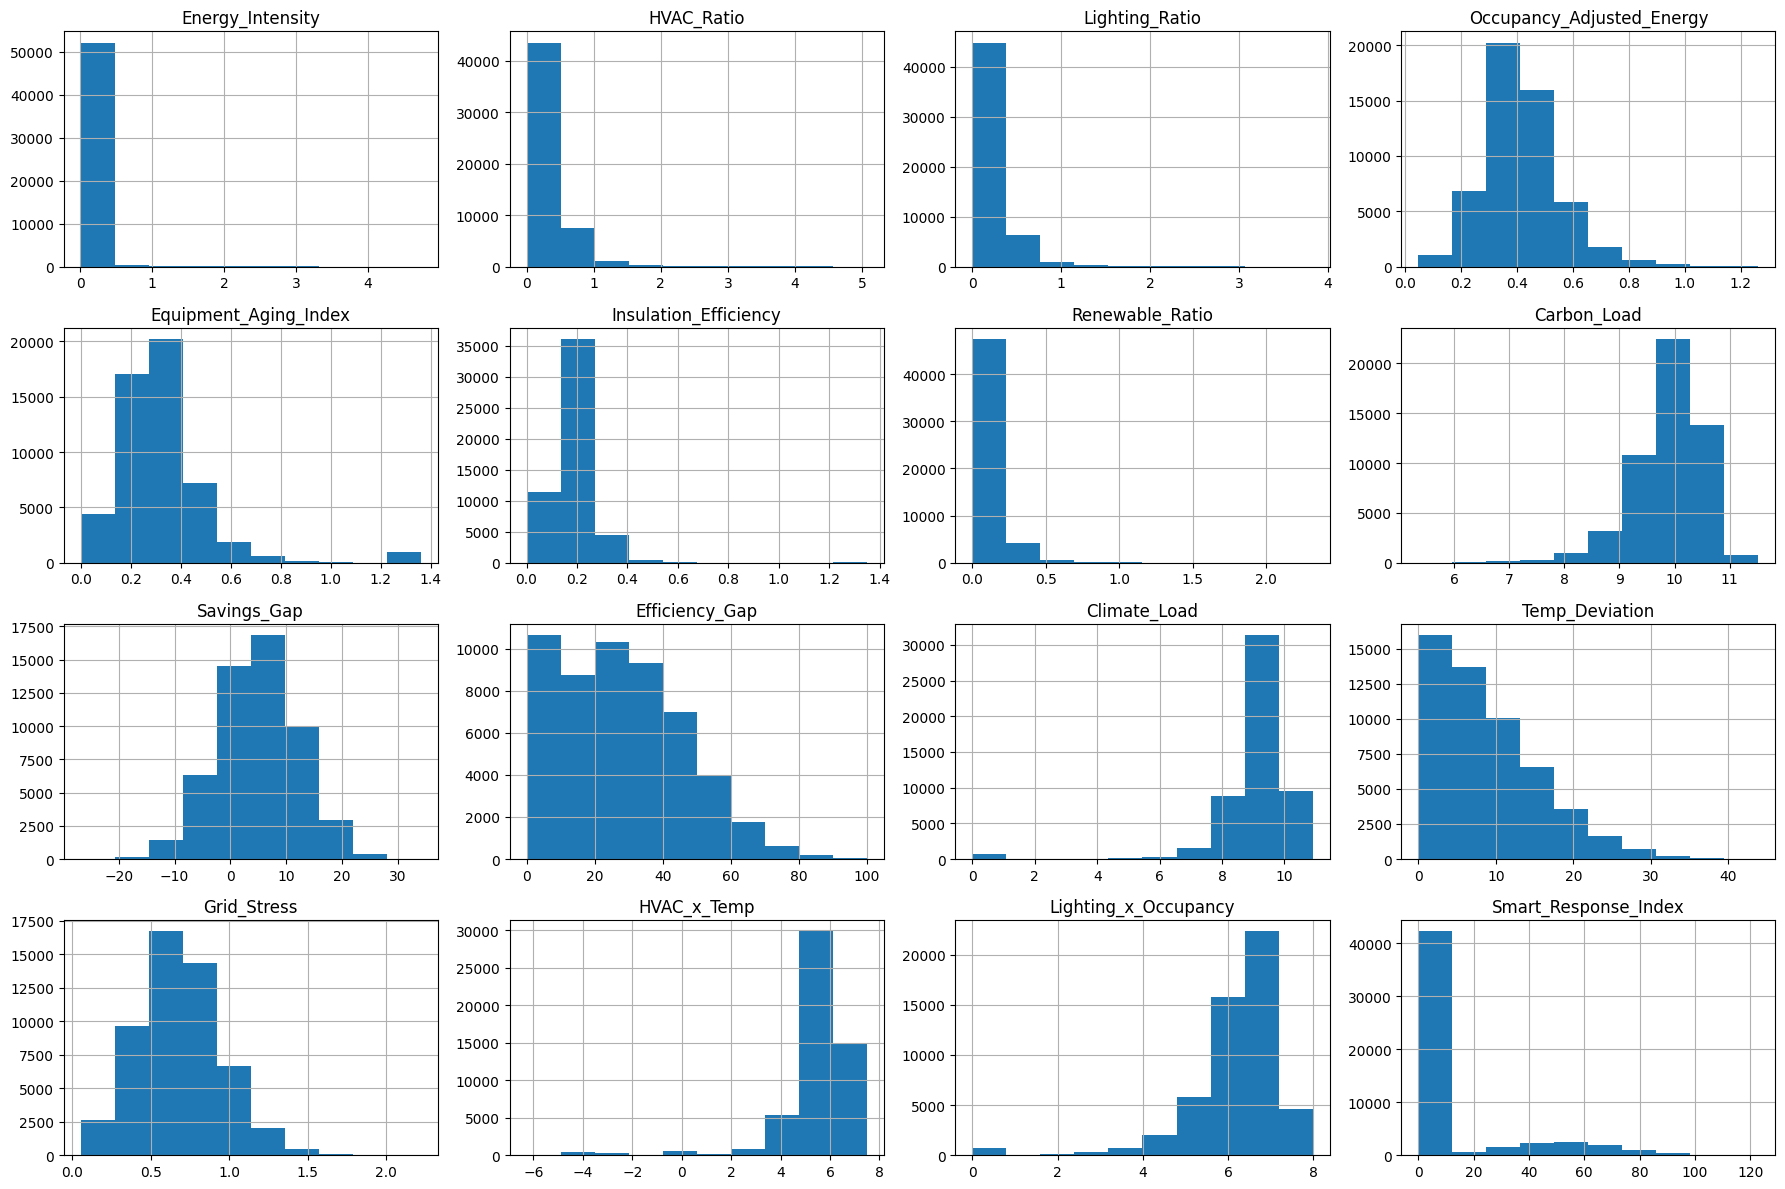

In [6]:

X.hist(figsize=(18,12))
plt.tight_layout()
plt.show()

Doing scaling by standard scaler 

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = X_scaled.clip(-5, 5)

In [8]:
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [9]:
X_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
Energy_Intensity,52585.0,-2.807580e-02,0.590989,-0.549519,-0.294263,-0.169156,0.022205,5.000000
HVAC_Ratio,52585.0,-1.581903e-02,0.879888,-1.178833,-0.537931,-0.210436,0.231110,5.000000
Lighting_Ratio,52585.0,-1.482790e-02,0.887080,-1.169692,-0.545385,-0.214905,0.248987,5.000000
Occupancy_Adjusted_Energy,52585.0,-6.531407e-05,0.999659,-2.744267,-0.643357,-0.105200,0.528362,5.000000
Equipment_Aging_Index,52585.0,-4.148343e-03,0.978531,-1.671913,-0.532582,-0.136668,0.313320,5.000000
Insulation_Efficiency,52585.0,-1.230283e-02,0.881095,-2.376947,-0.590866,-0.141076,0.397191,5.000000
Renewable_Ratio,52585.0,-1.558548e-02,0.876672,-1.069153,-0.548749,-0.200261,0.262568,5.000000
Carbon_Load,52585.0,8.212984e-04,0.995484,-5.000000,-0.502208,0.151091,0.678665,2.580052
Savings_Gap,52585.0,1.251236e-16,1.000010,-4.457555,-0.677603,0.005433,0.679818,4.086452
Efficiency_Gap,52585.0,-1.840371e-16,1.000010,-1.488013,-0.777333,-0.051489,0.694648,3.907701


Applying PCA

In [10]:
pca = PCA()
X_pca_full = pca.fit_transform(X_scaled)

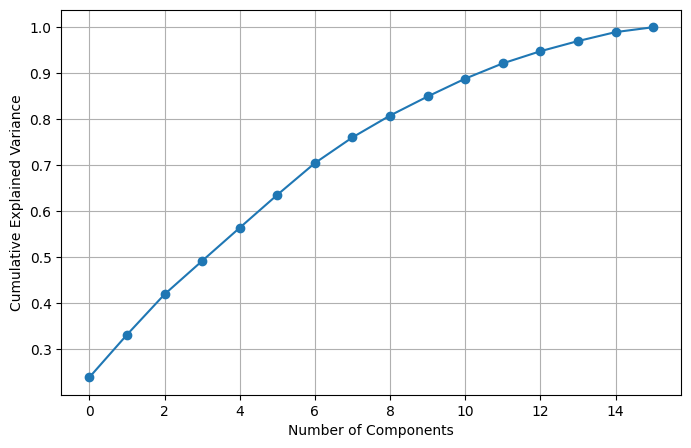

In [11]:
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid()
plt.show()

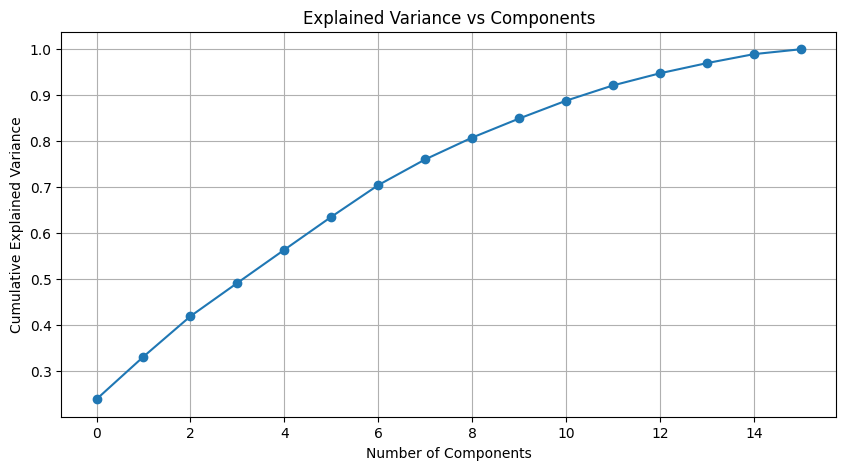

In [12]:
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(10,5))
plt.plot(np.cumsum(explained_variance), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs Components')
plt.grid(True)
plt.show()

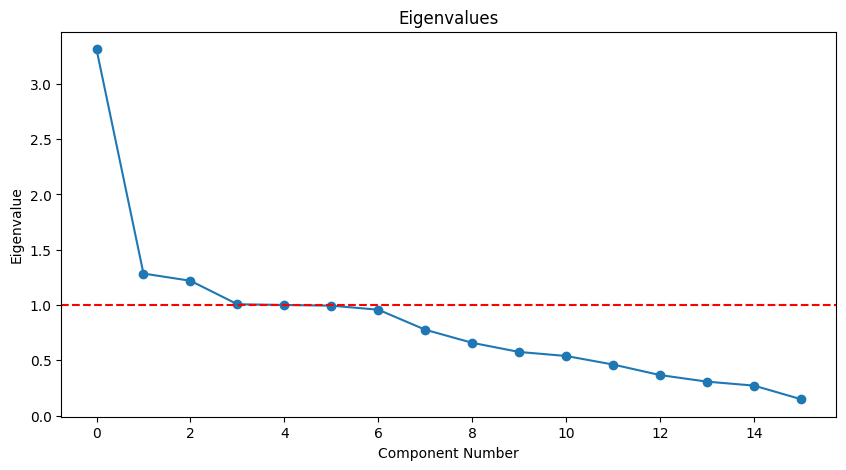

In [13]:
eigenvalues = pca.explained_variance_

plt.figure(figsize=(10,5))
plt.plot(eigenvalues, marker='o')
plt.axhline(y=1, color='r', linestyle='--')
plt.title('Eigenvalues')
plt.xlabel('Component Number')
plt.ylabel('Eigenvalue')
plt.show()

In [14]:
for i, var in enumerate(np.cumsum(pca.explained_variance_ratio_)):
    print(f"{i+1} components -> {var:.4f}")

1 components -> 0.2389
2 components -> 0.3314
3 components -> 0.4193
4 components -> 0.4919
5 components -> 0.5639
6 components -> 0.6356
7 components -> 0.7046
8 components -> 0.7605
9 components -> 0.8079
10 components -> 0.8494
11 components -> 0.8882
12 components -> 0.9214
13 components -> 0.9478
14 components -> 0.9699
15 components -> 0.9894
16 components -> 1.0000


First i selected the n =8 coz variance of it's is almost 85% but the sillohoute score for k =2 comes out to be 0.20 but with n = 5 when variance will be 65% the sillohoute score for  k = 2 is 0.26(17% higher)

In [15]:
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)
X_pca.shape

(52585, 4)

In [16]:
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(4)],
    index=X.columns
)

In [17]:
loadings.round(3)

,PC1,PC2,PC3,PC4
Energy_Intensity,0.096,0.014,0.043,-0.002
HVAC_Ratio,-0.372,-0.173,-0.078,0.000
Lighting_Ratio,-0.383,0.074,0.093,-0.007
Occupancy_Adjusted_Energy,0.381,-0.246,-0.362,0.004
Equipment_Aging_Index,0.000,-0.004,0.010,0.021
Insulation_Efficiency,-0.003,0.006,-0.010,-0.002
Renewable_Ratio,-0.344,-0.068,-0.141,-0.003
Carbon_Load,0.416,0.070,0.204,-0.008
Savings_Gap,-0.003,-0.013,0.016,0.652
Efficiency_Gap,-0.000,-0.010,0.012,0.696


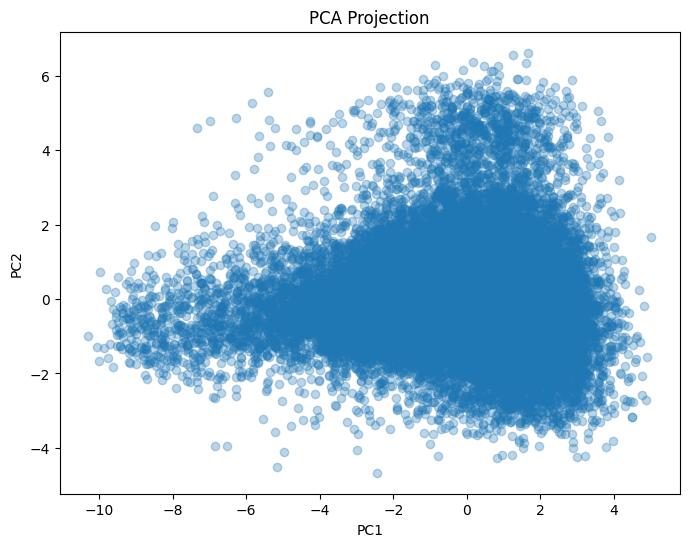

In [18]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], alpha=0.3)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Projection")
plt.show()

In [19]:
# ==============================
# PCA Variance Explained
# ==============================

import numpy as np

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

for i, var in enumerate(cumulative_variance):
    print(f"{i+1} components explain {round(var*100,2)}% variance")

print("\nFinal Selected Components:", 4)
print("Total Variance Retained:",
      round(cumulative_variance[3]*100,2), "%")

1 components explain 23.89% variance
2 components explain 33.14% variance
3 components explain 41.93% variance
4 components explain 49.19% variance

Final Selected Components: 4
Total Variance Retained: 49.19 %


In [20]:
X_pca_df = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(4)])
X_pca_df.to_csv("pca_transformed_data.csv", index=False)

In [21]:
df.to_csv("final_feature_engineered.csv", index=False)

In [22]:
pd.DataFrame(X_pca).to_csv("pca_clusters.csv", index=False)


AttributeError: 'numpy.ndarray' object has no attribute 'to_csv'